<a href="https://colab.research.google.com/github/evaliza/Alien-vs-Predator-episode-4/blob/main/episode_4_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

from tensorflow.keras.models import load_model
from  tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import *

# Import Data

In [ ]:
path_data = '/content/drive/MyDrive/Colab Notebooks/Alien_vs_Predator/'

In [ ]:
path_test = path_data + 'Test/'

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)


test_generator = test_datagen.flow_from_directory(path_test,
                                                    target_size=(150, 150),
                                                    batch_size=494, #full batch
                                                    class_mode='binary',
                                                    seed = 42)

Found 200 images belonging to 2 classes.


In [ ]:
X_test_4 = test_generator[0][0]
y_test_4 = test_generator[0][1]

## Load saved model

In [ ]:
#reconstructed_model = keras.models.load_model("episode4_model")
# Load the model from hard drive
model = load_model('/content/drive/MyDrive/Colab Notebooks/Alien_vs_Predator/' + 'model_ep4')
#/content/episode4_model

## TEST evaluation

In [ ]:
# another way to evaluate
loss, acc = model.evaluate(X_test_4, y_test_4, verbose=2)
print('model, accuracy: {:5.2f}%'.format(100 * acc))

7/7 - 42s - loss: 0.2423 - accuracy: 0.8750 - 42s/epoch - 6s/step
model, accuracy: 87.50%


In [ ]:
y_pred_test = (model.predict(X_test_4)> 0.5).astype('int32')

## Confusion matrix of TEST

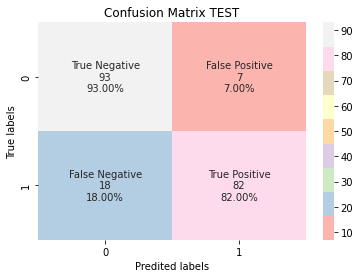

In [ ]:
cm_test = tf.math.confusion_matrix(y_test_4, y_pred_test).numpy()

ax= plt.subplot()

group_names = ["True Negative","False Positive","False Negative","True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cm_test.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in (cm_test/np.sum(cm_test, axis=1)).flatten()]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip (group_names, group_counts, group_percentages)]
labels = np.array(labels).reshape(2,2)

sns.heatmap(cm_test, annot=labels, fmt="", cmap="Pastel1")

ax.set_xlabel("Predited labels")
ax.set_ylabel("True labels") 
ax.set_title("Confusion Matrix TEST") 

plt.show()

**Conclusion:** in this last episode we managed to avoid overfitting issue by concatening VGG-16 and MLP.